# Perceptron

***

[Veja esse exemplo didático](https://www.w3schools.com/ai/ai_perceptrons.asp)

In [3]:
pip install ucimlrepo

## Importando bibliotecas

In [4]:
# Bibliotecas de manipualção e visualização de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Classes dos modelo
from sklearn.linear_model import Perceptron

# Funções de avaliação dos modelos
from sklearn.metrics import (confusion_matrix,
                             ConfusionMatrixDisplay,
                             classification_report)

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

## Análise do conjunto de dados

In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets


dataset = pd.concat([X,y], axis=1)
dataset

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Separando o conjunto de dados

In [19]:
#Vamos usar somente duas features PetalLengthCm e PetalWidthCm
X = dataset.iloc[:,[2,3]]
y = dataset.iloc[:,[4]]

#Definindo semente
seed=42

#Mapeando os valores da classe para inteiro (para fins de visualização da região de decisão)
y = pd.factorize(dataset['class'])[0]

# para treinar e avaliar um classificador, precisamos dividir o dataset em dois conjuntos, ...
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=seed)

## Treinamento do modelo

In [20]:
# ... referenciando o modelo
model = Perceptron(random_state=seed)

#treinando o modelo
model.fit(X_train, y_train)

#predição
y_pred = model.predict(X_test)

In [21]:
# qual o resultado para esse classificador?
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.48      1.00      0.65        13
           2       1.00      0.23      0.38        13

    accuracy                           0.63        38
   macro avg       0.83      0.63      0.61        38
weighted avg       0.82      0.63      0.60        38



[[ 8  4  0]
 [ 0 13  0]
 [ 0 10  3]]

 Labels:[0 1 2] 



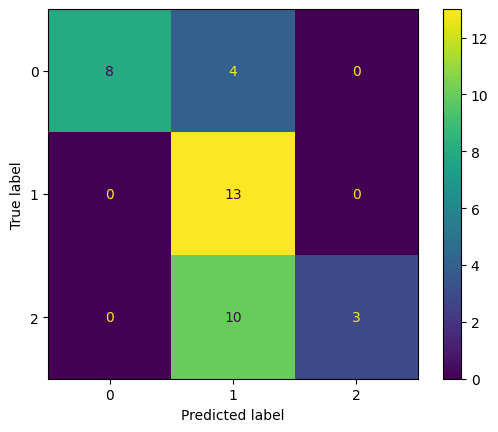

In [22]:
# a função confusion matrix retorna uma matriz com a contagem de como cada
# uma das classes está sendo classificada corretamente ou erroneamente
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
print(cm)

print(f"\n Labels:{model.classes_} \n")

#display_labels - define como será a ordem das classes na matriz
disp_cm = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
disp_cm.plot()


In [25]:
def show_decision_region(X, y, model):
    feature_0 = X.columns[0]
    feature_1 = X.columns[1]

    plot_decision_regions(np.array([X[feature_0].values,
                                    X[feature_1].values]).T,
                                    y, model)
    plt.xlabel(feature_0)
    plt.ylabel(feature_1)

    plt.title(model.__class__.__name__)
    plt.show()

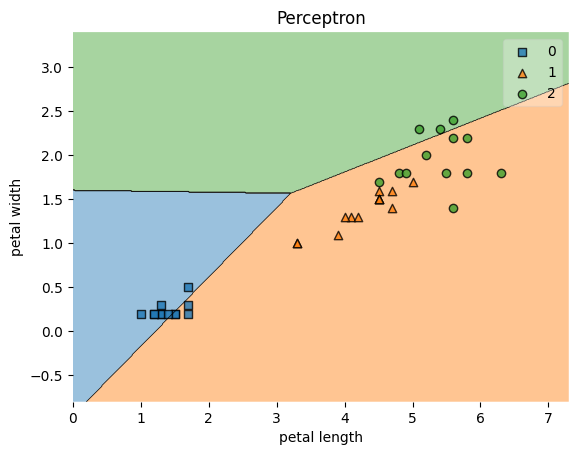

In [26]:
show_decision_region(X_test, y_test, model)

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1], #Constant that multiplies the regularization term if regularization is used
    'max_iter': [1000, 2000, 3000],
    'shuffle': [True, False]
}

model = Perceptron()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f'Melhores hiperparâmetros: {grid_search.best_params_}')

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy}')


Melhores hiperparâmetros: {'alpha': 0.0001, 'max_iter': 1000, 'penalty': 'l1', 'shuffle': False}
Acurácia do modelo: 0.8947368421052632


[[12  0  0]
 [ 0 13  0]
 [ 0  4  9]]

 Labels:[0 1 2] 



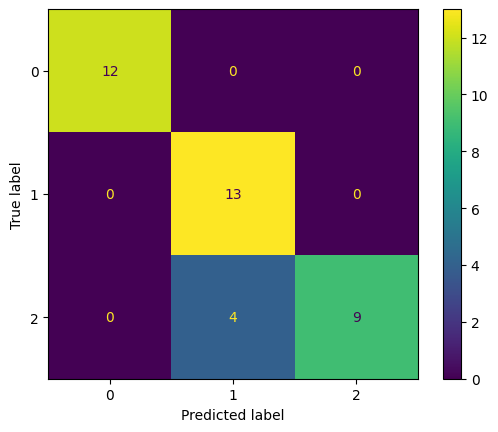

In [29]:
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
print(cm)
print(f"\n Labels:{best_model.classes_} \n")

disp_cm = ConfusionMatrixDisplay(cm, display_labels=best_model.classes_)
disp_cm.plot()
plt.show()


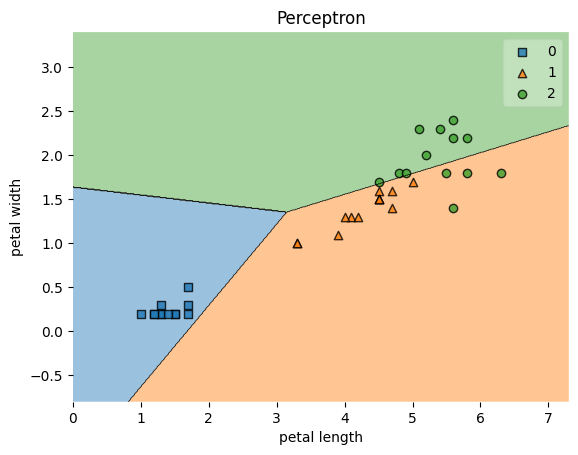

In [30]:
show_decision_region(X_test, y_test, best_model)